## EDA AND FEATURE ENGINEERING

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Spectrum Buildtech\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
directory_name = "cleaned data"

if not os.path.exists(directory_name):
    os.makedirs(directory_name)

In [8]:
path = 'cleaned data'

csv_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]

dfs = [pd.read_csv(f) for f in csv_files]

# Merging the dataframes on the 'DATE' column
df_final = pd.concat(dfs, ignore_index=False).groupby('DATE').sum()

In [9]:
df_final.head()

,all_Const_Emp,emratio,GDP,home_ow_rate,house_st,income,IPI_Cement,labor_percent,monthly_supply,mortgage_rate,...,new_private_house,new_private_hw_under,permit,population,PPI_Cement,PPI_Concrete,p_saving_rate,CSUSHPISA,total_emp_cons,unemployed_rate
DATE,,,,,,,,,,,,,,,,,,,,,
2003-09-01,850.2,62.0,11566.669,68.3,1939.0,9582.5,154.9852,66.1,3.8,0.00,...,1719.0,1121.0,1961.0,291321.0,0.0,154.4,4.9,136.294,6783.0,6.1
2003-09-05,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.0,6.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
2003-09-12,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.0,6.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
2003-09-19,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.0,6.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
2003-09-26,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.0,5.98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0


In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253 entries, 2003-09-01 to 2023-09-01
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   all_Const_Emp         1253 non-null   float64
 1   emratio               1253 non-null   float64
 2   GDP                   1253 non-null   float64
 3   home_ow_rate          1253 non-null   float64
 4   house_st              1253 non-null   float64
 5   income                1253 non-null   float64
 6   IPI_Cement            1253 non-null   float64
 7   labor_percent         1253 non-null   float64
 8   monthly_supply        1253 non-null   float64
 9   mortgage_rate         1253 non-null   float64
 10  MSPUS                 1253 non-null   float64
 11  new_private_house     1253 non-null   float64
 12  new_private_hw_under  1253 non-null   float64
 13  permit                1253 non-null   float64
 14  population            1253 non-null   float64
 15  PPI_Cement 

In [12]:
df_final.describe()

,all_Const_Emp,emratio,GDP,home_ow_rate,house_st,income,IPI_Cement,labor_percent,monthly_supply,mortgage_rate,...,new_private_house,new_private_hw_under,permit,population,PPI_Cement,PPI_Concrete,p_saving_rate,CSUSHPISA,total_emp_cons,unemployed_rate
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,...,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,149.703911,11.560894,3384.674850,12.613328,237.908220,2912.149002,21.548758,12.289385,1.205826,3.925834,...,230.049481,197.539505,249.435754,60746.718722,28.994428,41.687504,1.133759,35.940488,1313.031923,1.138787
std,312.874281,23.714513,7188.706812,26.002947,526.038732,6192.296766,45.951421,25.202734,2.611557,2.046096,...,505.831916,434.777268,551.085765,124661.053463,61.307253,87.653951,2.794998,76.409322,2713.155172,2.506078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.140000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.630000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1022.000000,63.400000,27644.463000,69.400000,2273.000000,24471.800000,192.032200,66.400000,12.200000,7.230000,...,2245.000000,1710.000000,2263.000000,335587.795000,240.111000,336.455000,32.000000,311.175000,8006.000000,14.700000


### Plotting density plot for all the numerical features

<Figure size 864x432 with 0 Axes>

<Figure size 432x288 with 0 Axes>

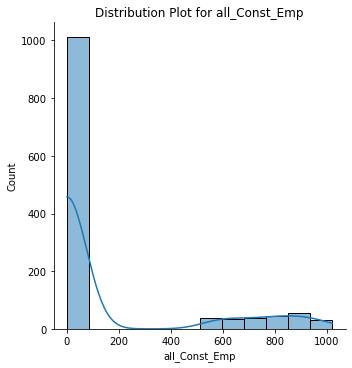

<Figure size 432x288 with 0 Axes>

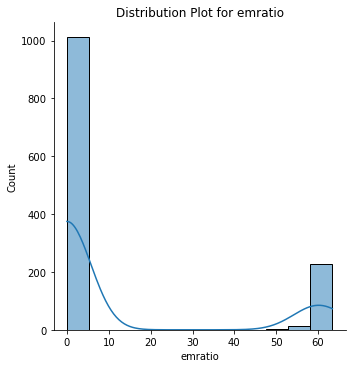

<Figure size 432x288 with 0 Axes>

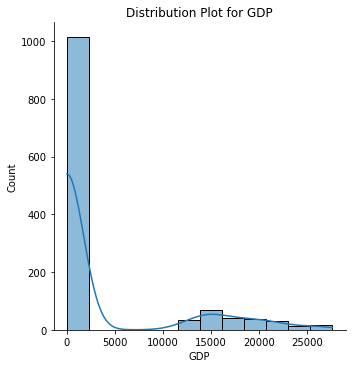

<Figure size 432x288 with 0 Axes>

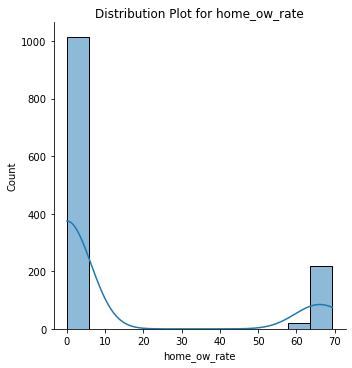

<Figure size 432x288 with 0 Axes>

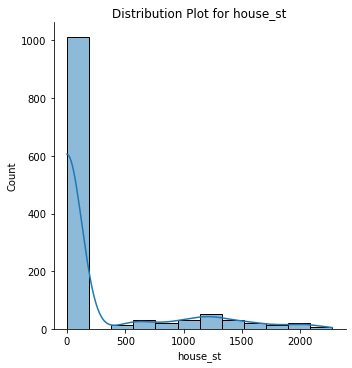

<Figure size 432x288 with 0 Axes>

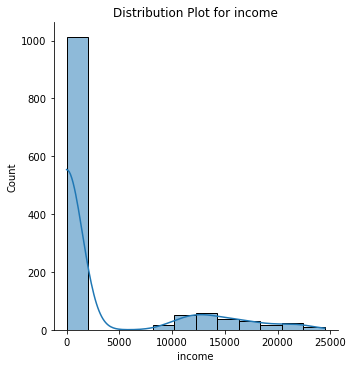

<Figure size 432x288 with 0 Axes>

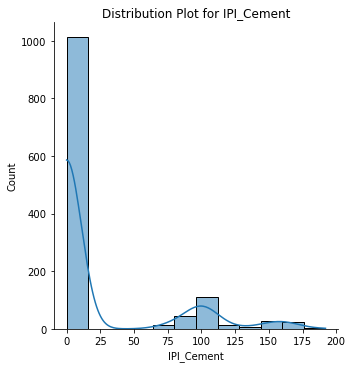

<Figure size 432x288 with 0 Axes>

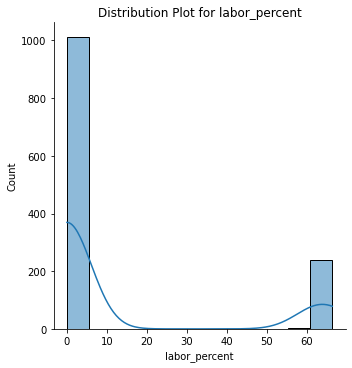

<Figure size 432x288 with 0 Axes>

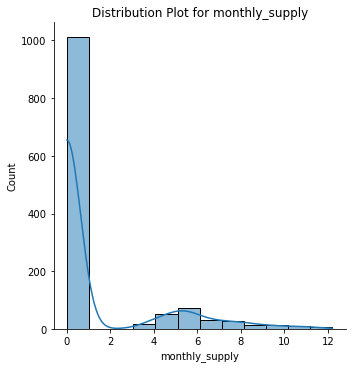

<Figure size 432x288 with 0 Axes>

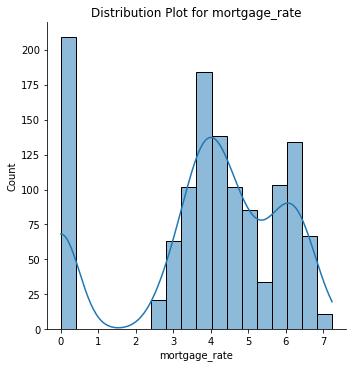

<Figure size 432x288 with 0 Axes>

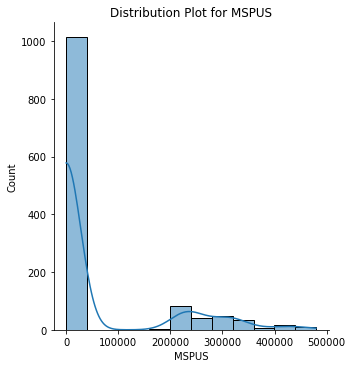

<Figure size 432x288 with 0 Axes>

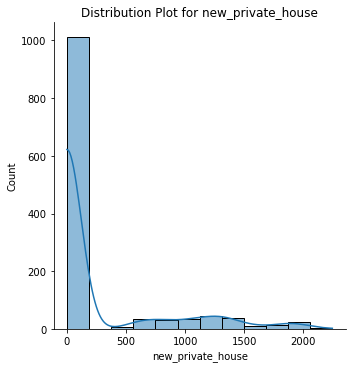

<Figure size 432x288 with 0 Axes>

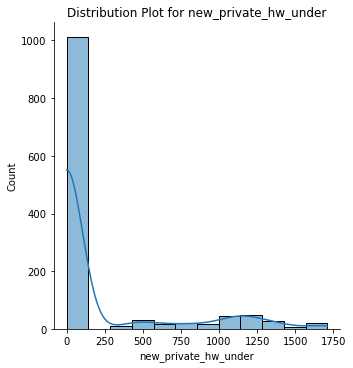

<Figure size 432x288 with 0 Axes>

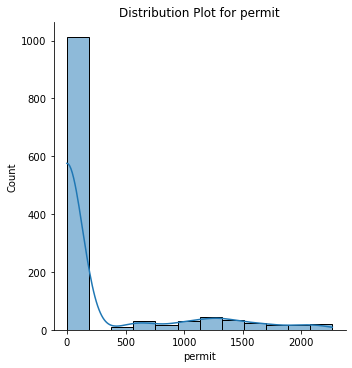

<Figure size 432x288 with 0 Axes>

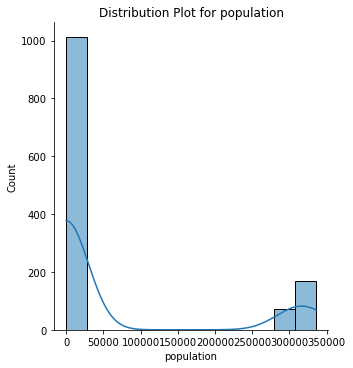

<Figure size 432x288 with 0 Axes>

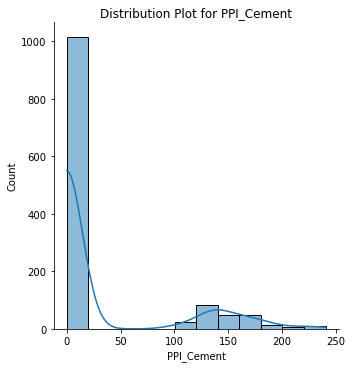

<Figure size 432x288 with 0 Axes>

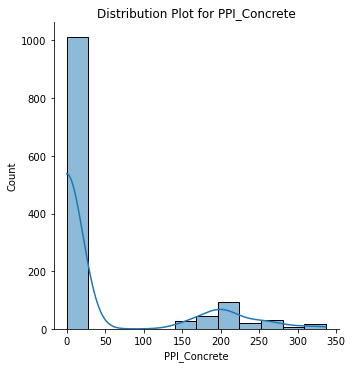

<Figure size 432x288 with 0 Axes>

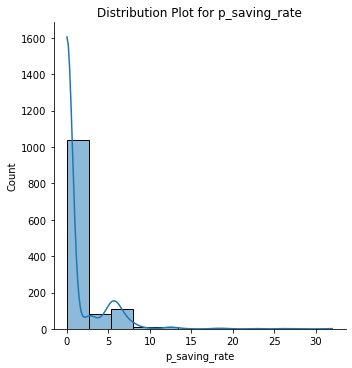

<Figure size 432x288 with 0 Axes>

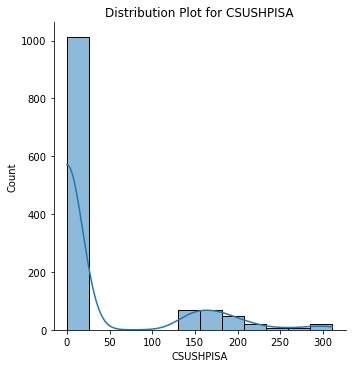

<Figure size 432x288 with 0 Axes>

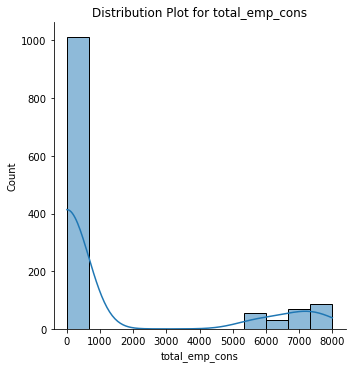

<Figure size 432x288 with 0 Axes>

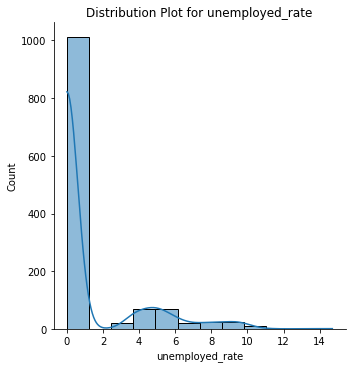

In [13]:
plt.figure(figsize=(12, 6))
for col in df_final.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.displot(data=df_final, x=col, kde =True)
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.title(f'Distribution Plot for {col}')
    plt.show()

### Plotting boxplot for analyzing the outliers in the data

<Figure size 864x432 with 0 Axes>

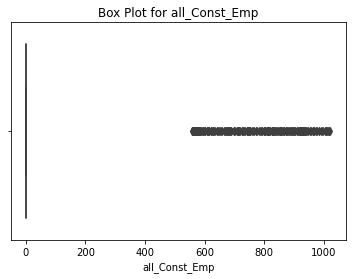

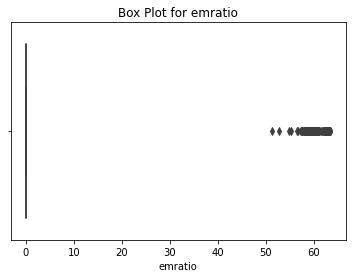

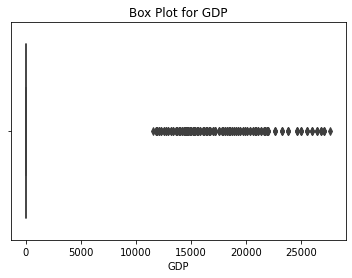

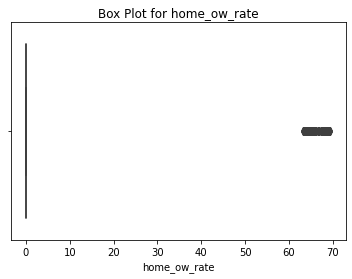

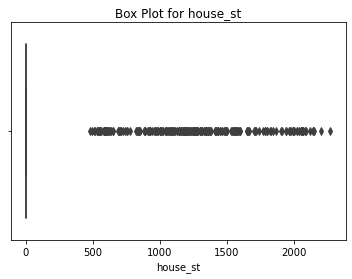

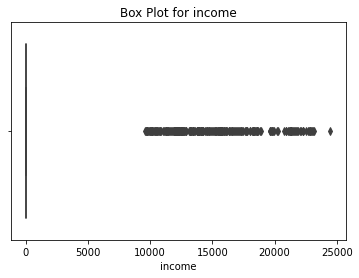

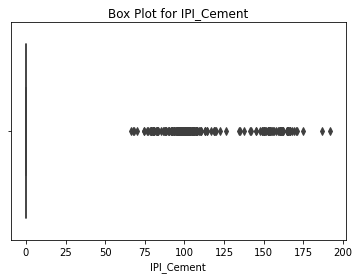

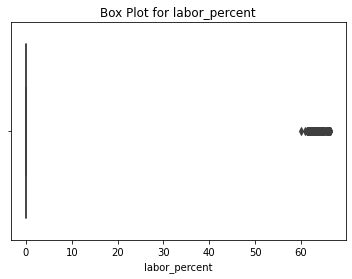

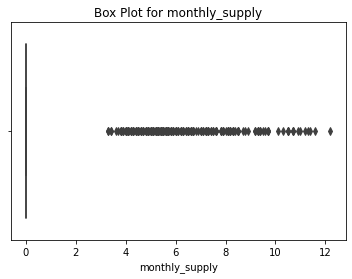

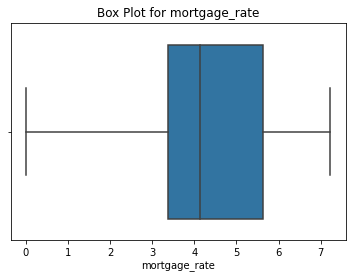

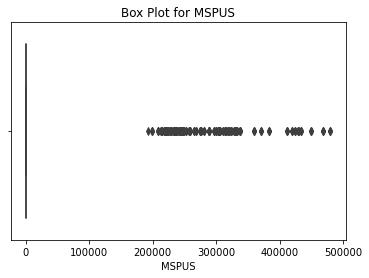

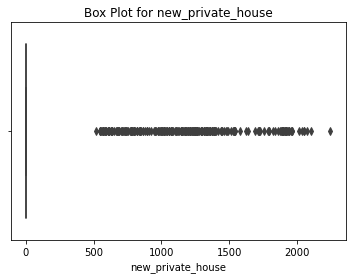

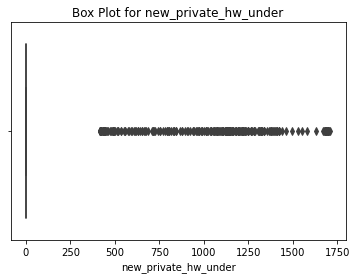

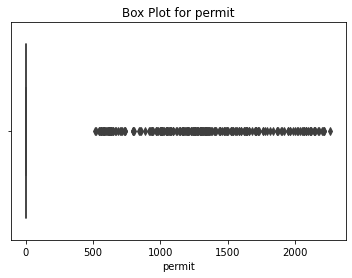

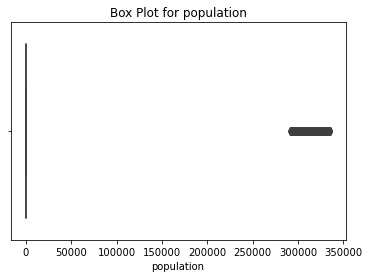

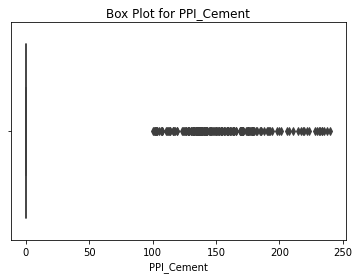

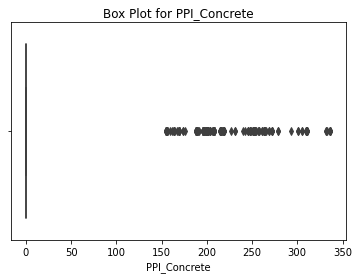

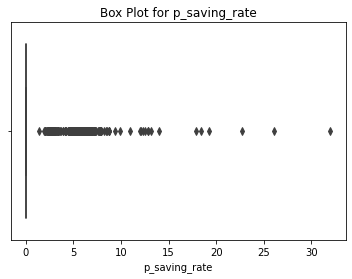

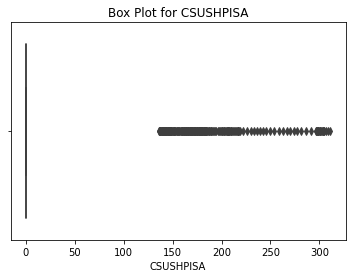

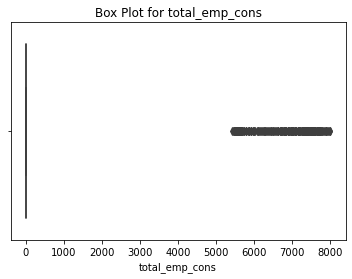

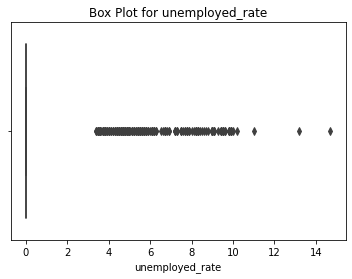

In [14]:
plt.figure(figsize=(12, 6))
for col in df_final.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_final, x=col)
    plt.xlabel(f"{col}")
    plt.title(f'Box Plot for {col}')
    plt.show()

**We have outliers in few features:**

- p_saving_rate
- PPI_Concrete
- new_private_house
- emratio
- new_private_hw_under
- monthly_supply
- unemployed_rate

### Treating Skewness and Outliers:

#### p_saving_rate

In [15]:
df_final['p_saving_rate'].skew()

3.869644627174333

- Personal saving rate column is highly right skewed. Hence we will apply IQR method for handling outliers.

In [16]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["p_saving_rate"].quantile(0.25)
q2 = df_final["p_saving_rate"].quantile(0.75)

IQR =q2-q1

In [17]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

0.0
0.0


(None, None)

In [18]:
# capping the features to upper boundry only.
df_final.loc[df_final['p_saving_rate'] >=upper_bridge,'p_saving_rate'] = upper_bridge

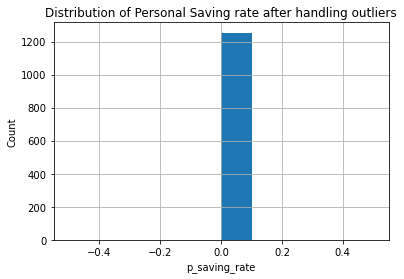

In [19]:
df_final['p_saving_rate'].hist()
plt.title("Distribution of Personal Saving rate after handling outliers")
plt.xlabel("p_saving_rate")
plt.ylabel("Count")
plt.show()

#### PPI_Concrete

In [20]:
df_final['PPI_Concrete'].skew()

1.7684000649883602

- Producer price index of concrete column is highly right skewed. Hence we will apply Log transformation for handling skewness first.

In [21]:
df_final['PPI_Concrete'] = np.log1p(df_final['PPI_Concrete'])

<AxesSubplot:>

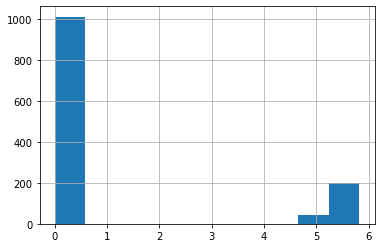

In [22]:
df_final['PPI_Concrete'].hist()

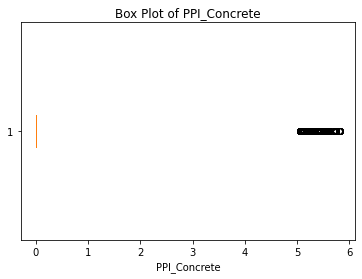

In [23]:
plt.boxplot(df_final['PPI_Concrete'], vert=False)
plt.xlabel('PPI_Concrete')
plt.title('Box Plot of PPI_Concrete')
plt.show()

- Skewness and outliers both removed by using log transformation.

#### new_private_house

In [24]:
df_final['new_private_house'].skew()

2.057898082982043

- New private house completely constructed units- column is negatively skewed and having outliers in the maximum side. We are going to apply yeo-johnson transformation for removing skewness.

In [25]:
from scipy import stats

transformed_data, lambda_value = stats.yeojohnson(df_final['new_private_house'])
df_final['new_private_house'] = transformed_data

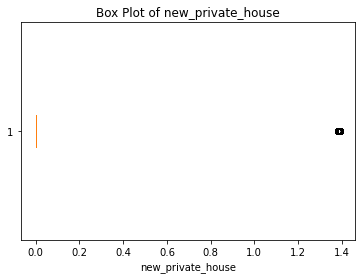

In [26]:
plt.boxplot(df_final['new_private_house'], vert=False)
plt.xlabel('new_private_house')
plt.title('Box Plot of new_private_house')
plt.show()

In [27]:
max_value = df_final['new_private_house'].max()

df_final['new_private_house'] = np.where(df_final['new_private_house'] > max_value, max_value, df_final['new_private_house'])


#### emratio

In [28]:
df_final['emratio'].skew()

1.567708908970524

- Employment population ratio column is negatively skewed and having outliers in the minimum side. We are going to apply IQR method for handling outliers.

In [29]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["emratio"].quantile(0.25)
q2 = df_final["emratio"].quantile(0.75)

IQR =q2-q1

In [30]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

0.0
0.0


(None, None)

In [31]:
df_final.loc[df_final['emratio'] <=lower_bridge,'emratio'] = lower_bridge

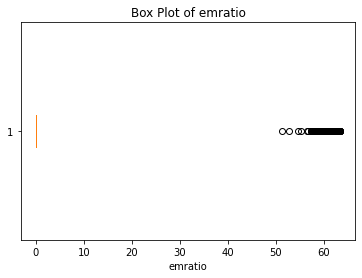

In [32]:
plt.boxplot(df_final['emratio'], vert=False)
plt.xlabel('emratio')
plt.title('Box Plot of emratio')
plt.show()

#### new_private_hw_under

In [33]:
df_final['new_private_hw_under'].skew()

2.012036275436981

- New private house units under contruction column is right skewed. We will apply IQR Method to deal with the outliers.

In [34]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["new_private_hw_under"].quantile(0.25)
q2 = df_final["new_private_hw_under"].quantile(0.75)

IQR =q2-q1

In [35]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

0.0
0.0


(None, None)

In [36]:
df_final.loc[df_final['new_private_hw_under'] >=upper_bridge,'new_private_hw_under'] = upper_bridge

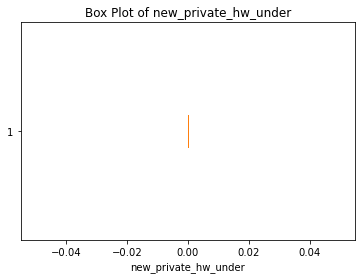

In [37]:
plt.boxplot(df_final['new_private_hw_under'], vert=False)
plt.xlabel('new_private_hw_under')
plt.title('Box Plot of new_private_hw_under')
plt.show()

#### Monthly_supply

In [38]:
df_final['monthly_supply'].skew()

2.0024263635673125

- Monthly supply of houses column is right skewed. We will apply IQR Method to deal with the outliers.

In [39]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["monthly_supply"].quantile(0.25)
q2 = df_final["monthly_supply"].quantile(0.75)

IQR =q2-q1

In [40]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

0.0
0.0


(None, None)

In [41]:
df_final.loc[df_final['monthly_supply'] >=upper_bridge,'monthly_supply'] = upper_bridge

<AxesSubplot:>

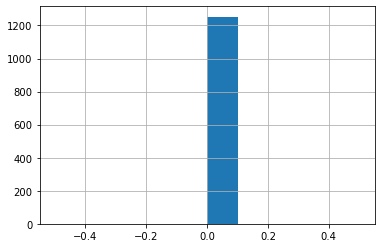

In [42]:
df_final['monthly_supply'].hist()

#### unemployed_rate

In [43]:
df_final['unemployed_rate'].skew()

2.1351592020635923

In [44]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["unemployed_rate"].quantile(0.25)
q2 = df_final["unemployed_rate"].quantile(0.75)

IQR =q2-q1

In [45]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

0.0
0.0


(None, None)

In [46]:
df_final.loc[df_final['unemployed_rate'] >=upper_bridge,'unemployed_rate'] = upper_bridge

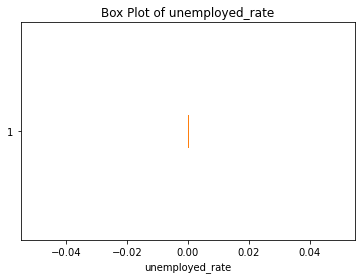

In [47]:
plt.boxplot(df_final['unemployed_rate'], vert=False)
plt.xlabel('unemployed_rate')
plt.title('Box Plot of unemployed_rate')
plt.show()

### Understanding the Correlations between the data

In [49]:
corr_matrix= df_final.corr()
corr_matrix['CSUSHPISA'].sort_values(ascending=False)

CSUSHPISA               1.000000
income                  0.990512
PPI_Cement              0.988538
MSPUS                   0.982888
total_emp_cons          0.980424
GDP                     0.978905
all_Const_Emp           0.974160
PPI_Concrete            0.972432
population              0.971795
new_private_house       0.964513
emratio                 0.963151
labor_percent           0.959851
home_ow_rate            0.950756
permit                  0.936319
house_st                0.932618
IPI_Cement              0.915052
mortgage_rate          -0.752664
monthly_supply               NaN
new_private_hw_under         NaN
p_saving_rate                NaN
unemployed_rate              NaN
Name: CSUSHPISA, dtype: float64

### Checking Multicollinearity

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df_final.columns

vif_data["VIF"] = [variance_inflation_factor(df_final.values, i)
                          for i in range(len(df_final.columns))]

print(vif_data)

                 feature            VIF
0          all_Const_Emp    9035.305627
1                emratio   61402.553007
2                    GDP    6406.568362
3           home_ow_rate   15090.143855
4               house_st     359.835084
5                 income    1874.108052
6             IPI_Cement     234.863868
7          labor_percent  185366.624262
8         monthly_supply            NaN
9          mortgage_rate       1.005484
10                 MSPUS    1362.674747
11     new_private_house  377532.659152
12  new_private_hw_under            NaN
13                permit     364.729725
14            population  141507.252029
15            PPI_Cement     228.856397
16          PPI_Concrete   74927.341988
17         p_saving_rate            NaN
18             CSUSHPISA    3034.545340
19        total_emp_cons   12216.537583
20       unemployed_rate            NaN


C:\Users\Spectrum Buildtech\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


We have high multicollinearity in our data. Need to handle this before fedding into the model

In [51]:
df_final.to_csv("df_final.csv")